### Load libraries


In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
#import phase_portraits as pp
#from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets#
import ipywidgets as widgets
import pandas as pd
from IPython.display import Image
import seaborn as sns
import scipy.stats as stats
from scipy.integrate import odeint

%matplotlib inline

We are going to look at the following SIR modell with vaccination:


This is an example of a compartment model, simulating how people are moving from one compartment to the other. When susceptible, $S$, meet infected $I$ they have a certain probability of being infected. After a while the infected recover, entering the $R$ compartment. In this model the recovered are again transferred back to the $S$ compartment, they are only immune for a certain amount of time. In the model we can also have an arrow bringing individuals from $S$ to $R$ directly, assuming that the vaccination is only efficient for the same time as for the individual recovered after an infection. The vaccination effort, denoted $V$ in the figure. We're later going to assume that $V$ is either a constant, i.e. a continuous vaccination program, or proportional to the infection level, i.e. reaction to an outbreak.
$$
\begin{array}{rl}
\frac{dS}{dt}  & = -  I S + \mu R \\
\frac{dI}{dt}  & =   I S - I  \\
\frac{dR}{dt}  & = R_0 I -\mu R  \nonumber
\end{array}
$$
where $S$, $I$ and $R$ are, respectively, the fraction of the population that are susceptible, infected, and recovered. This is an example of a compartment model, simulating how people are moving from one compartment to the other. When susceptible, $S$, meet infected *I* they have a certain probability of being infected. *V* represent vaccination, i.e. moving individuals directly from *S* to *R*. 








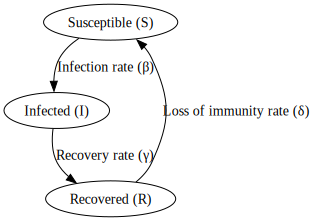

In [3]:
from graphviz import Digraph
from IPython.display import display

dot = Digraph()

# Nodes
dot.node('S', 'Susceptible (S)', pos='0,1!')
dot.node('I', 'Infected (I)', pos='1,0!')
dot.node('R', 'Recovered (R)', pos='0,-1!')

# Edges
dot.edge('S', 'I', label='Infection rate (β)')
dot.edge('I', 'R', label='Recovery rate (γ)')
dot.edge('R', 'S', label='Loss of immunity rate (δ)')

# Set graph attributes for circular layout
dot.attr(overlap='false')
dot.attr(splines='true')

# Display the graph inline
display(dot)


In [4]:
# Define the function.
def rhs_SI(t,xy,gamma = 0.25, beta = 0.5,mu=0.05,U=0):
    S,I=xy
    #phi,mu,U=args
    dx= - beta*I*S + mu*(1. - S - I)- U
    dy= beta*I*S - gamma*I
    return [dx,dy]

def stop_condition(t, xy,phi=0,mu=0.5,U=0):
    return [1-xy[0]-xy[1]]

In [19]:
# The SIRS model differential equations.

days = range(0, 40)

def deriv(state, t, R0, mu):
    S, I, R = state
    # Change in S population over time
    dSdt = - R0 * S * I + mu*R
    # Change in I population over time
    dIdt = R0 * S * I -  I
    # Change in R population over time
    dRdt =   I - mu*R
    return dSdt, dIdt, dRdt


#mylayout =Layout(width='10cm')

def g(time,mu,R0):
    init=[0.99,0.01,0]
    days=np.linspace(0, time,num=3*time)
    ret = odeint(deriv, init,
             days,
             args=(R0 ,mu))

    S, I, R = ret.T

    df = pd.DataFrame({
    'susceptible': S,
    'infectious': I,
    'recovered': R,
    'time': days})

    fig,axs=plt.subplots(2,2,figsize=(10, 5))
    ax_upper = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    

    df.plot(x='time',
            y=['infectious', 'susceptible', 'recovered'],
            color=['#bb6424', '#aac6ca', '#cc8ac0'],
            ax=ax_upper )
    
    df.plot(x='susceptible',
            y=['infectious'],
            color=['#bb6424'],
            ax=axs[1,0] )
    df.plot(x='susceptible',
            y=[ 'recovered'],
            color=['#cc8ac0'],
            ax=axs[1,1] )
    
    plt.show()

    print('max number of infected =',np.max(I));


interact(g, 
            time=widgets.Dropdown(
                options=[10,40, 100, 160],
                value=40,
                description='time:',
                disabled=False,),
            mu=widgets.Dropdown(
                options=[0., 0.01, 0.02, 0.05, 0.1,0.5,1.],
                value=0.,
                description='delta:',
                disabled=False,),
             R0=widgets.FloatSlider(min=0.5, max=4., step=0.1, value=1.8, description='R0:',
                                  continuous_update=False,readout=True, readout_format='.1f'));



# interact(g, r=widgets.FloatSlider(min=0, max=5, step=0.1, value=0.5, description='eff.contact rate:',
#                                   continuous_update=False,layout=mylayout,readout=True, readout_format='.1f',),
#             b=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.25, description='recovery rate:',
#                                   continuous_update=False,layout=mylayout,readout=True, readout_format='.2f',));




# If you get the error:
#
#     When stacked is True, each column must be either all
#     positive or negative.infected contains both...
#
# just change stacked=True to stacked=False

interactive(children=(Dropdown(description='time:', index=1, options=(10, 40, 100, 160), value=40), Dropdown(d…

## Sannsynlighets fordelinger

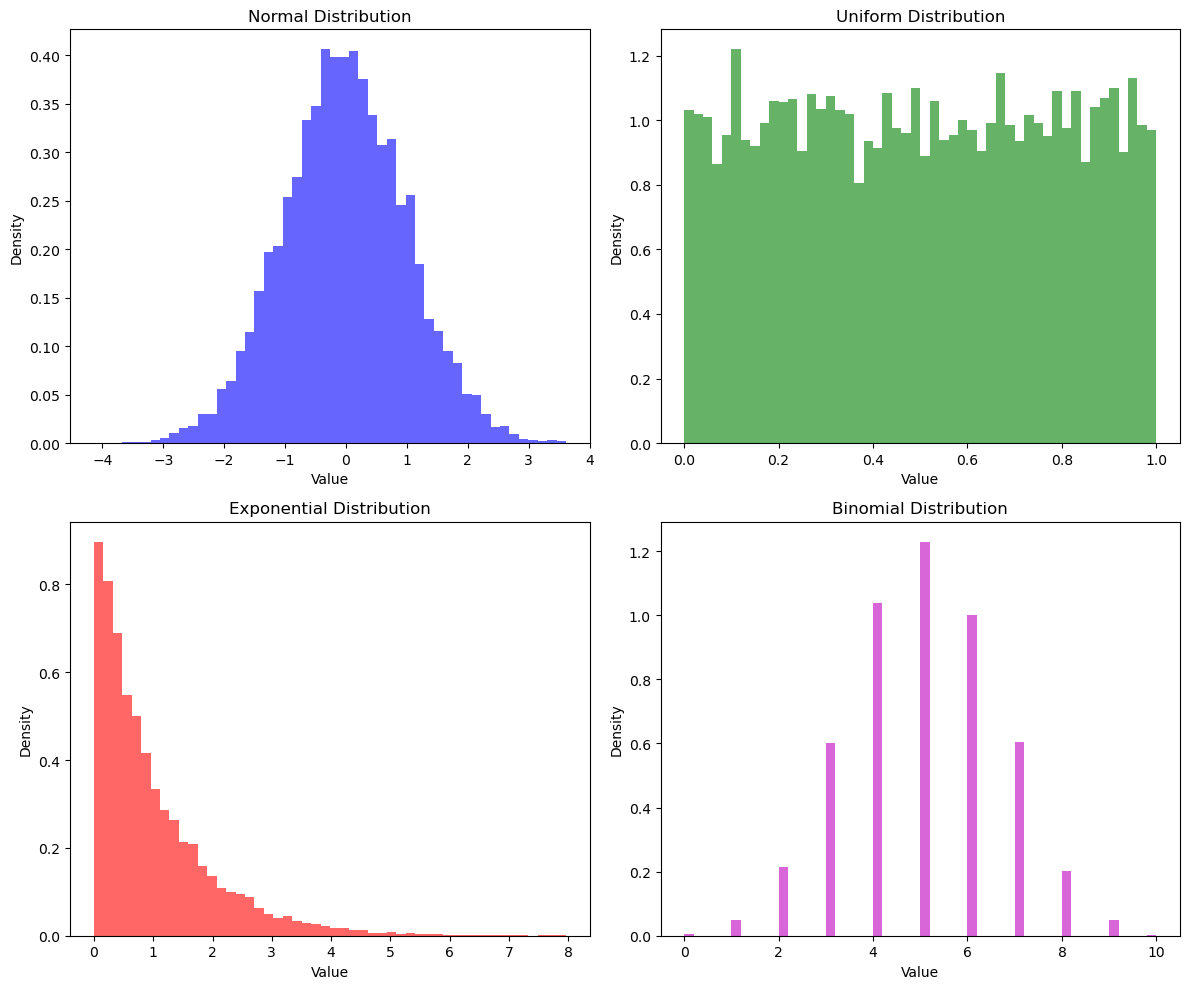

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
num_samples = 10000

# Generate samples from different distributions
normal_samples = np.random.normal(loc=0, scale=1, size=num_samples)
uniform_samples = np.random.uniform(low=0, high=1, size=num_samples)
exponential_samples = np.random.exponential(scale=1, size=num_samples)
binomial_samples = np.random.binomial(n=10, p=0.5, size=num_samples)

# Plot the distributions
plt.figure(figsize=(12, 10))

# Normal Distribution
plt.subplot(2, 2, 1)
plt.hist(normal_samples, bins=50, density=True, alpha=0.6, color='b')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# Uniform Distribution
plt.subplot(2, 2, 2)
plt.hist(uniform_samples, bins=50, density=True, alpha=0.6, color='g')
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# Exponential Distribution
plt.subplot(2, 2, 3)
plt.hist(exponential_samples, bins=50, density=True, alpha=0.6, color='r')
plt.title('Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# Binomial Distribution
plt.subplot(2, 2, 4)
plt.hist(binomial_samples, bins=50, density=True, alpha=0.6, color='m')
plt.title('Binomial Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, gamma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


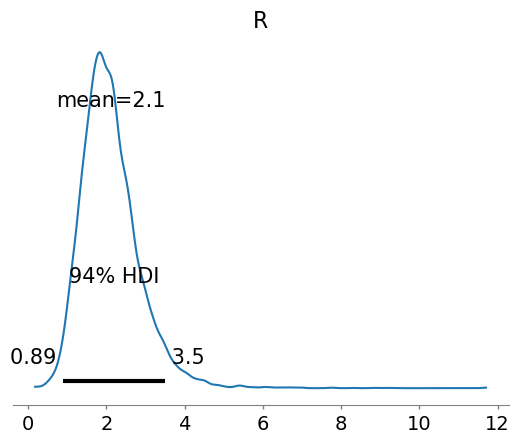

    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
R  2.109  0.758   0.888    3.485      0.009    0.007    7676.0    5681.0   

   r_hat  
R    1.0  


In [38]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Parameters for the normal distributions
beta_mean = 0.2
beta_std = 0.05
gamma_mean = 0.1
gamma_std = 0.02

# Define the PyMC model
with pm.Model() as model:
    # Priors for beta and gamma
    beta = pm.Normal('beta', mu=beta_mean, sigma=beta_std)
    gamma = pm.Normal('gamma', mu=gamma_mean, sigma=gamma_std)
    
    # Deterministic transformation for R
    R = pm.Deterministic('R', beta / gamma)
    
    # Sample from the posterior
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot the posterior distribution of R
az.plot_posterior(trace, var_names=['R'])
plt.show()

# Print summary statistics
print(az.summary(trace, var_names=['R']))



In [39]:
trace

Inference data with groups:
	> posterior
	> sample_stats

In [40]:
def test_distributions(data):
    distributions = ['norm', 'expon', 'lognorm', 'gamma', 'weibull_min']
    results = {}
    params_dict = {}

    for distribution in distributions:
        dist = getattr(stats, distribution)
        params = dist.fit(data)
        ks_stat, p_value = stats.kstest(data, distribution, args=params)
        results[distribution] = ks_stat
        params_dict[distribution] = params

    closest_distribution = min(results, key=results.get)
    return closest_distribution, params_dict[closest_distribution], results




def plot_distribution(data, distribution, params):
    # Generate the PDF values
    x = np.linspace(min(data), max(data), 100)
    dist = getattr(stats, distribution)
    pdf_values = dist.pdf(x, *params)

    # Plot the normalized histogram and the PDF
    plt.hist(data, bins=40, density=True, alpha=0.6, color='g', label='Data')
    plt.plot(x, pdf_values, label=f'{distribution} PDF')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Normalized Histogram and {distribution} PDF')
    plt.legend()
    plt.show()


In [41]:
trace.posterior['beta'].stack().values.ravel()

array([0.21413424, 0.2533464 , 0.23814061, ..., 0.14668701, 0.2178915 ,
       0.17835374])

In [42]:
test_distributions(trace.posterior['beta'].stack().values.ravel())

('norm',
 (0.20026524258059308, 0.050255324877235635),
 {'norm': 0.00788994642203622,
  'expon': 0.3848584173357749,
  'lognorm': 0.010133292471740218,
  'gamma': 0.009593390638057253,
  'weibull_min': 0.0207773779479955})

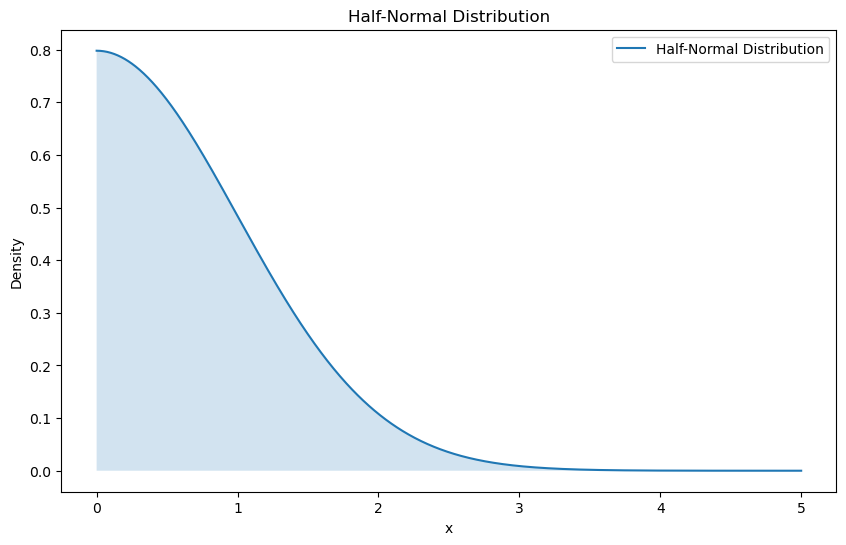

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import halfnorm

# Parameters
sigma = 1

# Generate data
x = np.linspace(0, 5, 1000)
pdf = halfnorm.pdf(x, scale=sigma)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Half-Normal Distribution')
plt.fill_between(x, pdf, alpha=0.2)
plt.title('Half-Normal Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


In [44]:
#Denne er ikke i bruk, bruker run_ensemble_pdf
def run_ensemble(l_num=1000, gamma = 0.25, beta_mean = .5, beta_std=0, mu = 0.05, U=0,t_end=40., y0=[0.99,0.01],t_num=41,dist=0):
# A function that runs the ensembles for the pendulum
# Input: l_num, the number of samples in the ensemble
#       length_mean, the mean length of the pendulum
#       length_std, standard deviation of the length of the pendulum
#       g, is the gravitational constant
#       dist, the distribution function to use
# Output: t time when we do the statistics. 
#         x_mean, the mean values
#         Standard deviations.             
    
#    beta=np.random.normal(loc=beta_mean,scale=beta_std, size=l_num)
    beta=np.random.uniform(low=np.maximum(0.,beta_mean-beta_std),high=beta_mean+beta_std, size=l_num)
#Create the time vector, this should be an input. 
            



#Create the time vector, this should be an input. 
    
    t = np.linspace(0, t_end, t_num)



# Store the results. 
    S=t*0
    S2=t*0
    I=S
    I2=S2
    R=S
    R2=S2


    
# Here we loop through the samples. 
    stop_condition.terminal = True
    for ii in np.arange(len(mu)):
        tmp=sc.integrate.solve_ivp(rhs_SI,t_span=(0.,t_end),y0=y0,
                                   t_eval=t,args=[gamma,beta[ii],mu,U])
#                                   events=stop_condition)
        #Sum the x and the x squared. 
        S=S+tmp.y[0]
        I=I+tmp.y[1]
        R=R+(1-tmp.y[0]-tmp.y[1])
        S2=S2+tmp.y[0]**2
        I2=I2+tmp.y[1]**2
        R2=R2+(1-tmp.y[0]-tmp.y[1])**2
# and do the statistics
    S=S/l_num
    S2=np.sqrt((S2/l_num)-S**2)
    I=I/l_num
    I2=np.sqrt((I2/l_num)-I**2)
    R=I/l_num
    R2=np.sqrt((R2/l_num)-R**2)

    df = pd.DataFrame({
    'S': S,
    'I': I,
    'R': R,
    'S2': S2,
    'I2': I2,
    'R2': R2,
    'day': t})


    return df
    




    



In [45]:

def run_ensemble_pd(l_num=1000, gamma = 0.25, beta_mean = .5, beta_std=0, mu = 0.05, U=0,t_end=40., y0=[0.99,0.01],t_num=41,dist=0):
# A function that runs the ensembles for the pendulum
# Input: l_num, the number of samples in the ensemble
#       length_mean, the mean length of the pendulum
#       length_std, standard deviation of the length of the pendulum
#       g, is the gravitational constant
#       dist, the distribution function to use
# Output: t time when we do the statistics. 
#         x_mean, the mean values
#         Standard deviations.             
    np.random.seed(0)
    
#    beta=np.random.normal(loc=beta_mean,scale=beta_std, size=l_num)
    beta=np.random.uniform(low=np.maximum(0.,beta_mean-beta_std),high=beta_mean+beta_std, size=l_num)
#Create the time vector, this should be an input. 
    
    t = np.linspace(0, t_end, t_num)



# Store the results. 
    df_list=[]
    
# Here we loop through the samples. 

    stop_condition.terminal = True
    for ii in np.arange(len(beta)):
        tmp=sc.integrate.solve_ivp(rhs_SI,t_span=(0.,t_end),y0=y0,
                                   t_eval=t,args=[gamma,beta[ii],mu,U])
#                                   , events=stop_condition)
        #Sum the x and the x squared. 
        df_loc = pd.DataFrame({
        'S': tmp.y[0],
        'I': tmp.y[1],
        'R': 1-tmp.y[0]-tmp.y[1],
        'day': t})
        df_loc.index = t
        df_list.append(df_loc)
    df= pd.concat(df_list,ignore_index=True)

    return df
    




    



In [46]:
def plot_func(gamma = 0.25, beta_mean = .5, beta_std=0, mu = 0.05, U=0):
    
    y0=[0.99,0.01]
    l_num=1000,
    t_end=40.
    t_num=41
    dist=0
    

    res=run_ensemble_pd(t_end=t_end,t_num=t_num,gamma=gamma,beta_mean = beta_mean, beta_std = beta_std, 
              mu = mu, U=U)

    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('S')
    ax.set_ylabel('I')
   
    
    ax=sns.lineplot(data=res,x='day',y='S',ax=ax,label='S')
    ax=sns.lineplot(data=res,x='day',y='I',ax=ax,label='I')
    ax=sns.lineplot(data=res,x='day',y='R',ax=ax,label='R')
#    ax.legend(['S','I','R'])
    return ax

gamma_slider=widgets.FloatSlider(value=0.05,
                                               min=0,
                                               max=.5,
                                               step=0.1)
mu_slider=widgets.FloatSlider(value=0.,
                                               min=0,
                                               max=1.0,
                                               step=0.1)

beta_slider=widgets.FloatSlider(value=0.5,
                                               min=0,
                                               max=1.9,
                                               step=0.1)

betastd_slider=widgets.FloatSlider(value=0,
                                               min=0,
                                               max=2.9,
                                               step=0.05)

U_slider=widgets.FloatSlider(value=0,
                                               min=0,
                                               max=0.1,
                                               step=0.01)

interact(plot_func, mu = mu_slider,
         beta_mean=beta_slider,beta_std=betastd_slider,gamma=gamma_slider,
         U=U_slider)

interactive(children=(FloatSlider(value=0.05, description='gamma', max=0.5), FloatSlider(value=0.5, descriptio…

<function __main__.plot_func(gamma=0.25, beta_mean=0.5, beta_std=0, mu=0.05, U=0)>

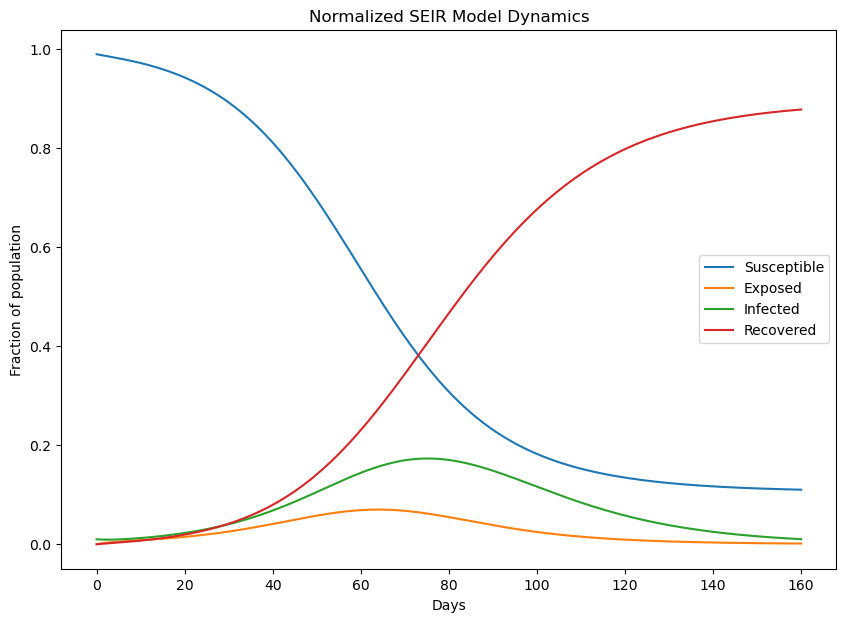

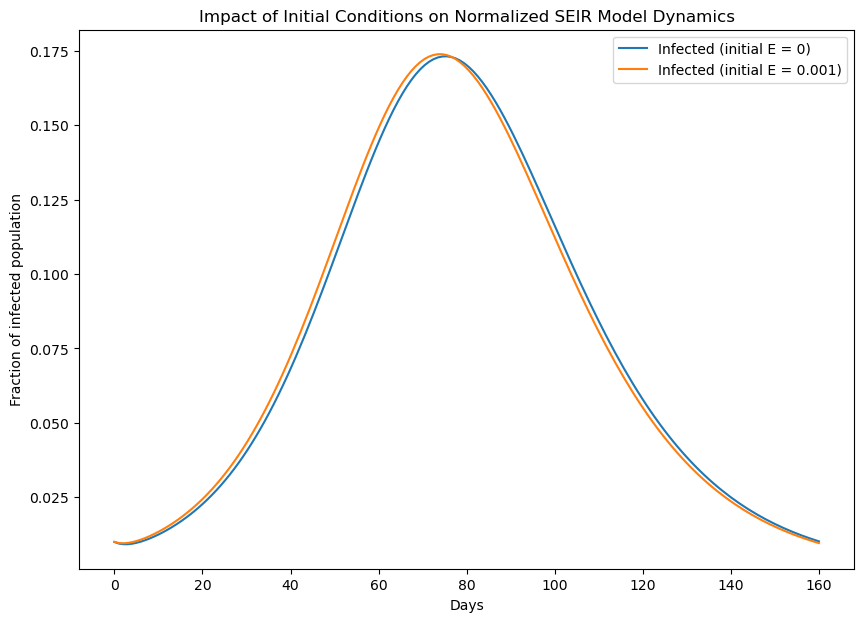

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# SEIR model differential equations
def seir_model(y, t, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I
    dEdt = beta * S * I - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

# Parameters
R0 = 2.5    # Basic reproduction number
gamma = 1/14  # Recovery rate (1/14 days)
sigma = 1/5   # Rate of progression from exposed to infected (1/5 days)
beta = R0 * gamma  # Infection rate

# Initial conditions
N = 1       # Total population (normalized)
I0 = 0.01   # Initial fraction of infected individuals
E0 = 0.0    # Initial fraction of exposed individuals
R0 = 0.0    # Initial fraction of recovered individuals
S0 = N - I0 - E0 - R0  # Initial fraction of susceptible individuals

# Initial conditions vector
y0 = [S0, E0, I0, R0]

# Time points
t = np.linspace(0, 160, 160)

# Solve ODE
solution = odeint(seir_model, y0, t, args=(beta, sigma, gamma))
S, E, I, R = solution.T

# Plot results
plt.figure(figsize=(10, 7))
plt.plot(t, S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Days')
plt.ylabel('Fraction of population')
plt.title('Normalized SEIR Model Dynamics')
plt.legend()
plt.show()

# Demonstrating uncertainties near bifurcation points
# Slightly different initial conditions
y0_1 = [S0, E0, I0, R0]
y0_2 = [S0, E0 + 0.001, I0, R0]  # Small change in initial exposed individuals

solution_1 = odeint(seir_model, y0_1, t, args=(beta, sigma, gamma))
solution_2 = odeint(seir_model, y0_2, t, args=(beta, sigma, gamma))

S1, E1, I1, R1 = solution_1.T
S2, E2, I2, R2 = solution_2.T

plt.figure(figsize=(10, 7))
plt.plot(t, I1, label='Infected (initial E = 0)')
plt.plot(t, I2, label='Infected (initial E = 0.001)')
plt.xlabel('Days')
plt.ylabel('Fraction of infected population')
plt.title('Impact of Initial Conditions on Normalized SEIR Model Dynamics')
plt.legend()
plt.show()



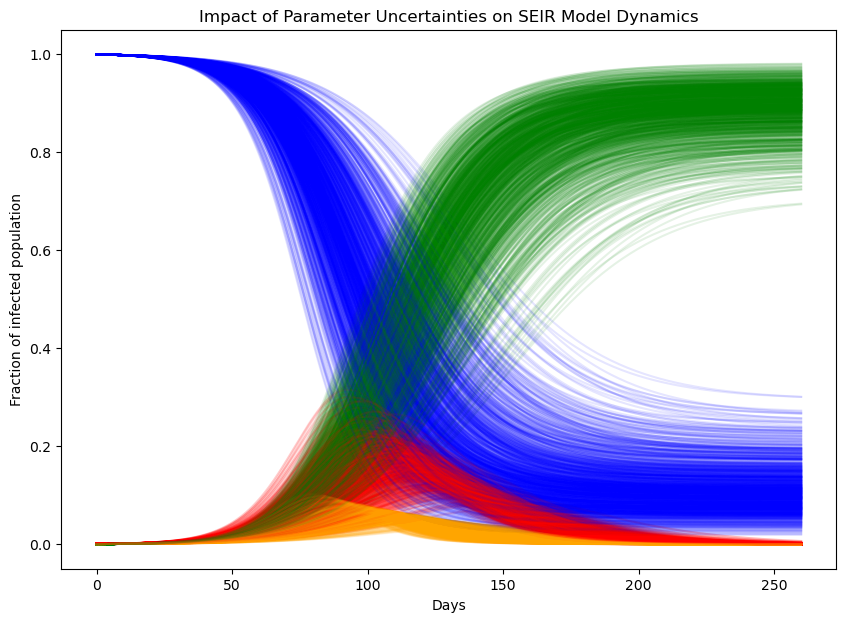

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# SEIR model differential equations
def seir_model(y, t, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I
    dEdt = beta * S * I - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

# Parameters
R0_mean = 2.5    # Mean basic reproduction number
gamma_mean = 1/14  # Mean recovery rate (1/14 days)
sigma = 1/5   # Rate of progression from exposed to infected (1/5 days)
beta_mean = R0_mean * gamma_mean  # Mean infection rate

# Standard deviations for Gaussian distributions
gamma_std = 0.01
beta_std = 0.01

# Initial conditions
N = 1       # Total population (normalized)
I0 = 0.001   # Initial fraction of infected individuals
E0 = 0.0    # Initial fraction of exposed individuals
R0 = 0.0    # Initial fraction of recovered individuals
S0 = N - I0 - E0 - R0  # Initial fraction of susceptible individuals

# Initial conditions vector
y0 = [S0, E0, I0, R0]

# Time points
t = np.linspace(0, 260, 260)

# Number of simulations
num_simulations = 1000

# Arrays to store results
results = []

for _ in range(num_simulations):
    # Draw beta and gamma from Gaussian distributions
    beta = np.random.normal(beta_mean, beta_std)
    gamma = np.random.normal(gamma_mean, gamma_std)
    
    # Solve ODE
    solution = odeint(seir_model, y0, t, args=(beta, sigma, gamma))
    results.append(solution)

# Convert results to numpy array for easier manipulation
results = np.array(results)

# Plot results
plt.figure(figsize=(10, 7))
for result in results:
    S, E, I, R = result.T
    plt.plot(t, S, color='blue', alpha=0.1)
    plt.plot(t, I, color='red', alpha=0.1)
    plt.plot(t, E, color='orange', alpha=0.1)
    plt.plot(t, R, color='green', alpha=0.1)

plt.xlabel('Days')
plt.ylabel('Fraction of infected population')
plt.title('Impact of Parameter Uncertainties on SEIR Model Dynamics')
plt.show()


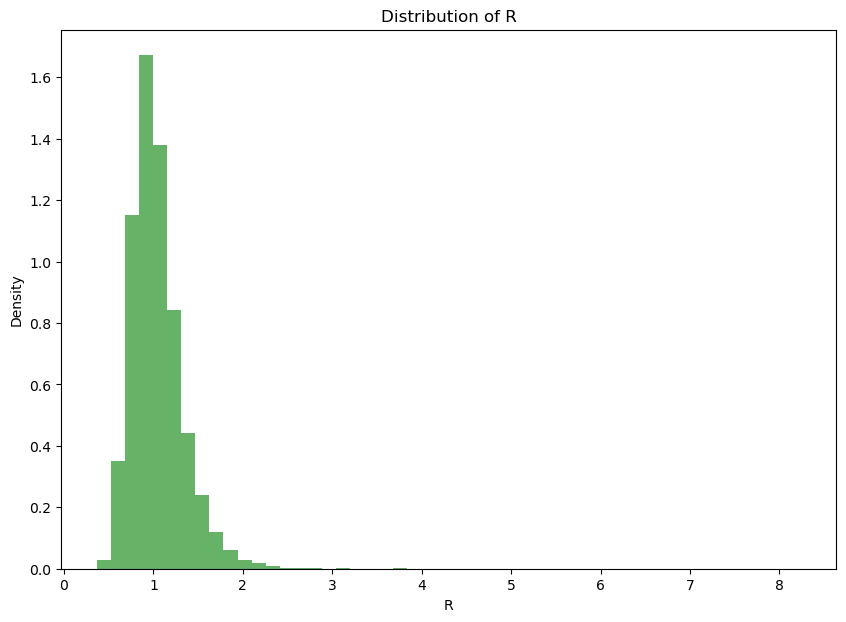

Mean of R: 1.0385215758521913
Standard Deviation of R: 0.29471523785198567
Skewness  of R: 2.679049586602282


In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Gaussian distributions
beta_mean = 0.1
beta_std = 0.015
gamma_mean = 0.1
gamma_std = 0.02

# Number of samples
num_samples = 10000

# Generate samples
beta_samples = np.random.normal(beta_mean, beta_std, num_samples)
gamma_samples = np.random.normal(gamma_mean, gamma_std, num_samples)

# Calculate R for each sample
R_samples = beta_samples / gamma_samples

# Plot the distribution of R
plt.figure(figsize=(10, 7))
plt.hist(R_samples, bins=50, density=True, alpha=0.6, color='g')
plt.title('Distribution of R')
plt.xlabel('R')
plt.ylabel('Density')
plt.show()

# Print summary statistics
print(f'Mean of R: {np.mean(R_samples)}')
print(f'Standard Deviation of R: {np.std(R_samples)}')
print(f'Skewness  of R: {sc.stats.skew(R_samples)}')


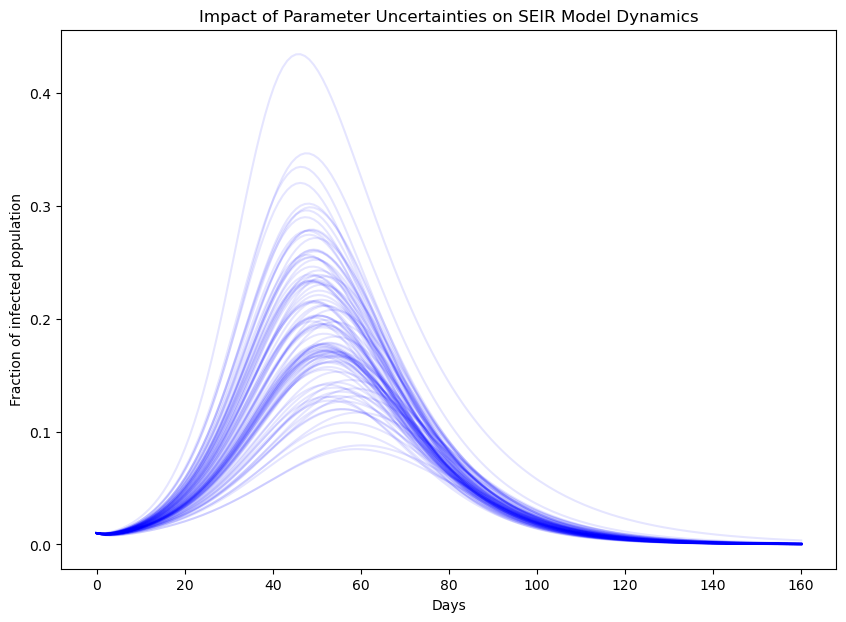

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# SEIR model differential equations
def seir_model(y, t, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I
    dEdt = beta * S * I - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

# Parameters for Gaussian distributions
beta_mean = 0.3
beta_std = 0.01
gamma_mean = 0.1
gamma_std = 0.02
sigma = 1/5  # Rate of progression from exposed to infected (1/5 days)

# Initial conditions
N = 1       # Total population (normalized)
I0 = 0.01   # Initial fraction of infected individuals
E0 = 0.0    # Initial fraction of exposed individuals
R0 = 0.0    # Initial fraction of recovered individuals
S0 = N - I0 - E0 - R0  # Initial fraction of susceptible individuals

# Initial conditions vector
y0 = [S0, E0, I0, R0]

# Time points
t = np.linspace(0, 160, 160)

# Number of simulations
num_simulations = 100

# Arrays to store results
results = []

for _ in range(num_simulations):
    # Draw beta and gamma from Gaussian distributions
    beta = np.random.normal(beta_mean, beta_std)
    gamma = np.random.normal(gamma_mean, gamma_std)
    
    # Solve ODE
    solution = odeint(seir_model, y0, t, args=(beta, sigma, gamma))
    results.append(solution)

# Convert results to numpy array for easier manipulation
results = np.array(results)

# Plot results
plt.figure(figsize=(10, 7))
for result in results:
    S, E, I, R = result.T
    plt.plot(t, I, color='blue', alpha=0.1)

plt.xlabel('Days')
plt.ylabel('Fraction of infected population')
plt.title('Impact of Parameter Uncertainties on SEIR Model Dynamics')
plt.show()


In [51]:
import numpy as np
import pymc as pm
import sunode
import sunode.wrappers.as_pytensor
import matplotlib.pyplot as plt
import arviz as az

# Example synthetic data
days = 160
data = {
    'new_cases': np.random.poisson(10, days),
    'recoveries': np.random.poisson(5, days),
    'deaths': np.random.poisson(1, days),
    'vaccinated': np.random.poisson(20, days),
    'tests_performed': np.random.poisson(100, days),
    'positive_tests': np.random.poisson(10, days)
}

# SEIR model differential equations
def seir_model(t, y, p):
    S, E, I, R = y
    dSdt = -p.beta * S * I
    dEdt = p.beta * S * I - p.sigma * E
    dIdt = p.sigma * E - p.gamma * I
    dRdt = p.gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

# Initial conditions
N = 1       # Total population (normalized)
I0 = data['new_cases'][0] / N
E0 = 0.0
R0 = data['recoveries'][0] / N
S0 = N - I0 - E0 - R0
y0 = [S0, E0, I0, R0]

# Time points
t = np.linspace(0, days, days)

# Bayesian inference with PyMC and sunode
with pm.Model() as model:
    # Priors for beta and gamma
    beta = pm.Normal('beta', mu=0.3, sigma=0.1)
    gamma = pm.Normal('gamma', mu=0.1, sigma=0.05)
    sigma = 1/5  # Fixed rate of progression from exposed to infected
    
    # SEIR model
    solution, _, problem, solver, _ = sunode.wrappers.as_pytensor.solve_ivp(
        y0=y0,
        t0=0.,
        params={'beta': beta, 'gamma': gamma, 'sigma': sigma},
        rhs=seir_model,
        tvals=t,
        solver_kwargs={'method': 'BDF'}
    )
    
    # Likelihood
    observed_cases = pm.Poisson('observed_cases', mu=solution[:, 2], observed=data['new_cases'])
    
    # Sample from the posterior
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot the posterior distribution of beta and gamma
az.plot_posterior(trace, var_names=['beta', 'gamma'])
plt.show()

# Calculate R0
R0_samples = trace.posterior['beta'] / trace.posterior['gamma']
az.plot_posterior({'R0': R0_samples})
plt.show()

# Print summary statistics
print(az.summary(trace, var_names=['beta', 'gamma']))
print(az.summary({'R0': R0_samples}))


AttributeError: 'tuple' object has no attribute 'items'

In [7]:
help(sunode.wrappers.as_pytensor.solve_ivp)

Help on function solve_ivp in module sunode.wrappers.as_pytensor:

solve_ivp(t0: float, y0: numpy.ndarray, params: Dict[str, Any], tvals: numpy.ndarray, rhs: Callable[[sympy.core.symbol.Symbol, numpy.ndarray, numpy.ndarray], Dict[str, Any]], derivatives: str = 'adjoint', coords: Optional[Dict[str, pandas.core.indexes.base.Index]] = None, make_solver=None, derivative_subset=None, solver_kwargs=None, simplify=None) -> Any



In [25]:
import numpy as np
import pymc as pm
import sunode
import sunode.wrappers.as_pytensor
import matplotlib.pyplot as plt
import arviz as az

# Example synthetic data
days = 160
data = {
    'new_cases': np.random.poisson(10, days),
    'recoveries': np.random.poisson(5, days),
    'deaths': np.random.poisson(1, days),
    'vaccinated': np.random.poisson(20, days),
    'tests_performed': np.random.poisson(100, days),
    'positive_tests': np.random.poisson(10, days)
}

# SEIR model differential equations
def seir_model(t, y, p): 
    dSdt = -p.beta * y.S * y.I
    dEdt = p.beta * y.S * y.I - p.sigma * y.E
    dIdt = p.sigma * y.E - p.gamma * y.I
    dRdt = p.gamma * y.I
    return [dSdt, dEdt, dIdt, dRdt]

# Initial conditions
N = 100000       # Total population (normalized)
I0 = data['new_cases'][0] / N
E0 = 0.0
R0 = data['recoveries'][0] / N
S0 = N - I0 - E0 - R0
#y0 = [S0, E0, I0, R0]
y0={
        # The initial conditions of the ode. Each variable
        # needs to specify a PyTensor or numpy variable and a shape.
        # This dict can be nested.
            'S': (S0, ()),
            'E': (E0, ()),
            'I': (I0, ()),
            'R': (R0, ())
        },
# Time points
t = np.linspace(0, days, days)
y0

({'S': (99999.99982, ()),
  'E': (0.0, ()),
  'I': (0.00014, ()),
  'R': (4e-05, ())},)

In [26]:

# Bayesian inference with PyMC and sunode
with pm.Model() as model:
    # Priors for beta and gamma
    beta = pm.Normal('beta', mu=0.3, sigma=0.1)
    gamma = pm.Normal('gamma', mu=0.1, sigma=0.05)
    sigma = 1/5  # Fixed rate of progression from exposed to infected
    
    # Measurement error for observed data
    measurement_error = pm.HalfNormal('measurement_error', sigma=0.1)
    
    # SEIR model
    solution, _, problem, solver, _ = sunode.wrappers.as_pytensor.solve_ivp(
        y0=y0,
        params={'beta': (beta, ()), 'gamma': (gamma, ()), 'sigma': (sigma, ())},
        rhs=seir_model,
        tvals=t,
        t0=t[0],  # Initial time
        solver_kwargs={'method': 'BDF'}
    )
    
    # Likelihood with measurement error
    observed_cases = pm.Normal('observed_cases', mu=solution[:, 2], sigma=measurement_error, observed=data['new_cases'])
    
    # Sample from the posterior
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot the posterior distribution of beta, gamma, and measurement error
az.plot_posterior(trace, var_names=['beta', 'gamma', 'measurement_error'])
plt.show()

# Calculate R0
R0_samples = trace.posterior['beta'] / trace.posterior['gamma']
az.plot_posterior({'R0': R0_samples})
plt.show()

# Print summary statistics
print(az.summary(trace, var_names=['beta', 'gamma', 'measurement_error']))
print(az.summary({'R0': R0_samples}))


ValueError: not enough values to unpack (expected 2, got 1)

In [19]:
import numpy as np
import sunode
import sunode.wrappers.as_pytensor
import pymc as pm

times = np.arange(1900,1921,1)
lynx_data = np.array([
    4.0, 6.1, 9.8, 35.2, 59.4, 41.7, 19.0, 13.0, 8.3, 9.1, 7.4,
    8.0, 12.3, 19.5, 45.7, 51.1, 29.7, 15.8, 9.7, 10.1, 8.6
])
hare_data = np.array([
    30.0, 47.2, 70.2, 77.4, 36.3, 20.6, 18.1, 21.4, 22.0, 25.4,
    27.1, 40.3, 57.0, 76.6, 52.3, 19.5, 11.2, 7.6, 14.6, 16.2, 24.7
])


def lotka_volterra(t, y, p):
    """Right hand side of Lotka-Volterra equation.

    All inputs are dataclasses of sympy variables, or in the case
    of non-scalar variables numpy arrays of sympy variables.
    """
    return {
        'hares': p.alpha * y.hares - p.beta * y.lynx * y.hares,
        'lynx': p.delta * y.hares * y.lynx - p.gamma * y.lynx,
    }


with pm.Model() as model:
    hares_start = pm.HalfNormal('hares_start', sigma=50)
    lynx_start = pm.HalfNormal('lynx_start', sigma=50)
    
    ratio = pm.Beta('ratio', alpha=0.5, beta=0.5)
        
    fixed_hares = pm.HalfNormal('fixed_hares', sigma=50)
    fixed_lynx = pm.Deterministic('fixed_lynx', ratio * fixed_hares)
    
    period = pm.Gamma('period', mu=10, sigma=1)
    freq = pm.Deterministic('freq', 2 * np.pi / period)
    
    log_speed_ratio = pm.Normal('log_speed_ratio', mu=0, sigma=0.1)
    speed_ratio = np.exp(log_speed_ratio)
    
    # Compute the parameters of the ode based on our prior parameters
    alpha = pm.Deterministic('alpha', freq * speed_ratio * ratio)
    beta = pm.Deterministic('beta', freq * speed_ratio / fixed_hares)
    gamma = pm.Deterministic('gamma', freq / speed_ratio / ratio)
    delta = pm.Deterministic('delta', freq / speed_ratio / fixed_hares / ratio)
    
    y_hat, _, problem, solver, _, _ = sunode.wrappers.as_pytensor.solve_ivp(
        y0={
        # The initial conditions of the ode. Each variable
        # needs to specify a PyTensor or numpy variable and a shape.
        # This dict can be nested.
            'hares': (hares_start, ()),
            'lynx': (lynx_start, ()),
        },
        params={
        # Each parameter of the ode. sunode will only compute derivatives
        # with respect to PyTensor variables. The shape needs to be specified
        # as well. It it infered automatically for numpy variables.
        # This dict can be nested.
            'alpha': (alpha, ()),
            'beta': (beta, ()),
            'gamma': (gamma, ()),
            'delta': (delta, ()),
            'extra': np.zeros(1),
        },
        # A functions that computes the right-hand-side of the ode using
        # sympy variables.
        rhs=lotka_volterra,
        # The time points where we want to access the solution
        tvals=times,
        t0=times[0],
    )
    
    # We can access the individual variables of the solution using the
    # variable names.
    pm.Deterministic('hares_mu', y_hat['hares'])
    pm.Deterministic('lynx_mu', y_hat['lynx'])
    
    sd = pm.HalfNormal('sd')
    pm.LogNormal('hares', mu=y_hat['hares'], sigma=sd, observed=hare_data)
    pm.LogNormal('lynx', mu=y_hat['lynx'], sigma=sd, observed=lynx_data)

In [11]:
with model:
    idata = pm.sample(tune=1000, draws=1000, chains=6, cores=6)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [hares_start, lynx_start, ratio, fixed_hares, period, log_speed_ratio, sd]


Output()


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.52031e-77 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES ERROR]  CVode
  At t = 1900 and h = 5.79951e-85, the corrector convergence test failed repeatedly or with |h| = hmin.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 1.52031e-77 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES ERROR]  CVode
  At t = 1900 and h = 5.79951e-85, the corrector convergence test failed repeatedly or with |h| = hmin.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.00171e-81 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES ERROR]  CVode
  At t = 1900 repeated recoverable right-hand side function errors.


[CVODES WARNING]  CVode
  Internal t = 1900 and h = 4.00171e-81 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES ERROR]  CVode
  At t = 1900 repeated recoverable right-hand side function error


[CVODES ERROR]  CVode
  At t = 1911.02, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1910.16, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1912.33, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1911.3, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODEA ERROR]  CVodeF
  At t = 1900.93, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1914.77, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1900.93, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1914.77, mxstep steps taken before reaching tout.


[CVODES ERRO


[CVODES ERROR]  CVode
  At t = 1910.01, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1911.05, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1910.12, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1910.19, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1912.14, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1911.42, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode


[CVODEA ERROR]  CVodeF
  At t = 1900.44, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1900.44, mxstep steps taken before reaching tout.


[CVODES ERROR]  CVode
  At t = 1900.12, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1914.01, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1910.13, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1906.11, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODEA ERROR]  CVodeF
  At t = 1904.93, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1904.93, mxstep steps taken before reaching tout.


[CVODES ERR


[CVODES ERROR]  CVode
  At t = 1909.02, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1906.03, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1905.02, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1901.01, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1909.05, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1908.04, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode


[CVODES ERROR]  CVode
  At t = 1911.2, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1910.7, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1910.38, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1910.06, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1909.69, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
  At t = 1909.35, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODES ERROR]  CVode
 


[CVODES ERROR]  CVode
  At t = 1900, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0




[CVODEA ERROR]  CVodeF
  At t = 1905.93, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1905.93, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1905.93, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1905.93, mxstep steps taken before reaching tout.


[CVODES WARNING]  CVode
  Internal t = 1905.93 and h = 8.71281e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1905.93 and h = 8.71281e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1905.93 and h = 8.71281e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1905.93 and h = 8.71281e-14 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1905.93 and h = 8.71281e-14 are such that t + h 


[CVODES ERROR]  CVode
  At t = 1900, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODEA ERROR]  CVodeF
  At t = 1900.35, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1900.35, mxstep steps taken before reaching tout.


[CVODES ERROR]  CVode
  At t = 1900.12, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0




[CVODES ERROR]  CVode
  At t = 1900, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODEA ERROR]  CVodeF
  At t = 1900.8, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1900.8, mxstep steps taken before reaching tout.


[CVODES ERROR]  CVode
  At t = 1900.07, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODEA ERROR]  CVodeF
  At t = 1900.66, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1900.66, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1900.29, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1900.29, mxstep steps taken before reaching tout.


[CVODES ERROR]  CVode
  At t = 1900.08, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODEA ERR


[CVODES ERROR]  CVode
  At t = 1900.01, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODEA ERROR]  CVodeF
  At t = 1900.01, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1900.01, mxstep steps taken before reaching tout.


[CVODES ERROR]  CVode
  At t = 1900.01, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODEA ERROR]  CVodeF
  At t = 1900.01, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1900.01, mxstep steps taken before reaching tout.


[CVODES ERROR]  CVode
  At t = 1900.01, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODEA ERROR]  CVodeF
  At t = 1900.01, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1900.01, mxstep steps taken before reaching tout.


[CVODE


[CVODES ERROR]  CVode
  At t = 1900, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODEA ERROR]  CVodeF
  At t = 1900.02, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1900.02, mxstep steps taken before reaching tout.


[CVODES ERROR]  CVode
  At t = 1900.01, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODEA ERROR]  CVodeF
  At t = 1900.02, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1900.02, mxstep steps taken before reaching tout.


[CVODES ERROR]  CVode
  At t = 1900.01, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0




[CVODES ERROR]  CVode
  At t = 1914.01, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODEA ERROR]  CVodeF
  At t = 1900.49, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1900.49, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1900.16, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1900.16, mxstep steps taken before reaching tout.


[CVODES ERROR]  CVode
  At t = 1900.01, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODEA ERROR]  CVodeF
  At t = 1900.07, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeF
  At t = 1900.07, mxstep steps taken before reaching tout.


[CVODES ERROR]  CVode
  At t = 1900.03, mxstep steps taken before reaching tout.


[CVODEA ERROR]  CVodeB
  Error occured while integrating backward problem # 0


[CVODE

Sampling 6 chains for 1_000 tune and 1_000 draw iterations (6_000 + 6_000 draws total) took 78 seconds.


In [12]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data